StatLib的加州房产价格数据集的价格预测线性回归模型

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 载入数据

In [2]:
data = pd.read_csv('./datasets/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# total_bedrooms有207个缺失值
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

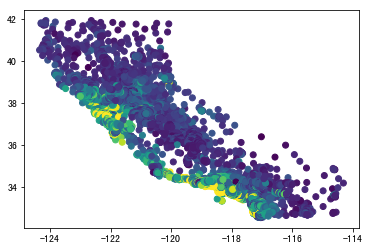

In [5]:
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'])

In [6]:
data.describe([0.1, 0.9])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
10%,-122.290000,33.630000,13.000000,941.000000,198.000000,510.000000,184.000000,1.903800,82300.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
90%,-117.250000,38.480000,46.000000,4651.500000,965.000000,2566.000000,890.000000,6.159210,376600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
 data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
# 分类变量的离散化
data_ocean_encoded = pd.get_dummies(data['ocean_proximity'])
df = pd.concat([data, data_ocean_encoded], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


#### baseline模型

In [9]:
df2 = df.copy()

In [10]:
df2.drop(columns=['ocean_proximity'], inplace=True)   # 删除非数字信息
df2.dropna(axis=0, inplace=True)   # 删除丢失信息
df2.shape

(20433, 14)

In [11]:
scaler = StandardScaler()
df2[['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms','population','households', 'median_income']] = scaler.fit_transform(df2[['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms','population','households', 'median_income']])

In [12]:
train_X,test_X, train_y, test_y = train_test_split(df2.drop(columns=['median_house_value']), df2[['median_house_value']], test_size=0.3, random_state=80)

In [13]:
train_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9236,-0.189322,0.621065,-0.844466,-0.293108,-0.377029,-0.086435,-0.375196,-0.664718,0,1,0,0,0
17966,-1.202534,0.784900,0.267395,-0.177788,-0.184801,-0.206452,-0.210399,0.913436,1,0,0,0,0
7446,0.704102,-0.797278,0.505651,-0.860100,-0.918115,-0.839184,-0.961138,-0.071113,1,0,0,0,0
5995,0.918723,-0.722382,0.108558,-0.133398,-0.099367,0.416573,-0.118846,-0.754859,0,1,0,0,0
2127,-0.079515,0.546169,-1.082722,-0.119212,0.000307,-0.201157,0.027640,-0.384080,0,1,0,0,0


In [14]:
estimator1 = LinearRegression()
estimator1.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print("训练集的RMSE为{}".format(np.sqrt(mean_squared_error(train_y, estimator1.predict(train_X)))))
print("测试集的RMSE为{}".format(np.sqrt(mean_squared_error(test_y, estimator1.predict(test_X)))))

训练集的RMSE为68223.55311608229
测试集的RMSE为69629.44268552063


#### 数据探索

深入的数据开展分析，揭示其中的相关性和特点

##### 初步总览

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17423a90>,
      dtype=object)

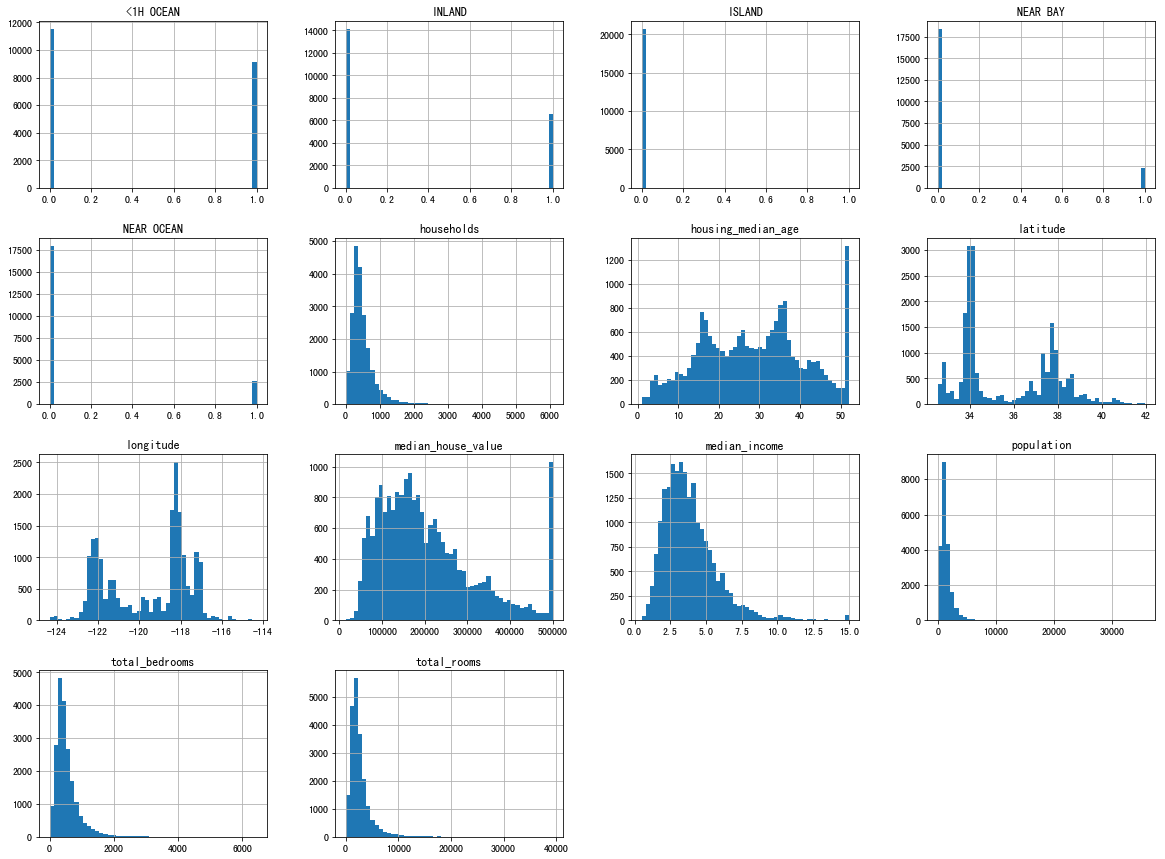

In [16]:
# 各特征的分布直方图
df.hist(bins=50, figsize=(20, 15))

观察数据分布情况，可能存在如下问题：<br>
1. 两端数据量激增，是否存在截断处理？ <br>
2. 单位是否存在问题？<br>
3. 偏态数据可能需要进行log、box-cox等处理，使其更正态

##### 划分测试集

在开始任何预处理前划分数据集，防止数据信息泄露，导致结果偏差

In [19]:
# 也可直接用sklearn中的接口train_test_split接口
def train_test_cut(data, test_ratio):
    random_index = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_index = random_index[:test_size]
    train_index = random_index[test_size:]
    return data.iloc[train_index], data.iloc[test_index]

In [21]:
train_set, test_set = train_test_cut(df, test_ratio=0.3)
print("{}train data, {}test data".format(len(train_set), len(test_set)))

14448train data, 6192test data


如果想要根据收入中位数进行分层采样

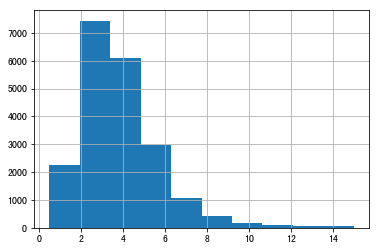

In [22]:
df['median_income'].hist()

In [26]:
# 先将收入中位数除以1.5以压缩取值范围，同时对超过值进行截断
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat']<5, 5, inplace=True)
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [41]:
# 分层采样
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [42]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350568
2.0    0.318868
4.0    0.176287
5.0    0.114480
1.0    0.039798
Name: income_cat, dtype: float64

In [43]:
# 删除分层所用的特征
for item in (strat_train_set, strat_test_set):
    item.drop('income_cat', axis=1, inplace=True)

##### 深入的数据探索

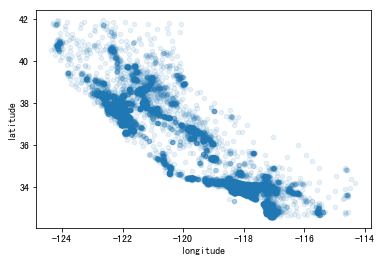

In [46]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1)

No handles with labels found to put in legend.


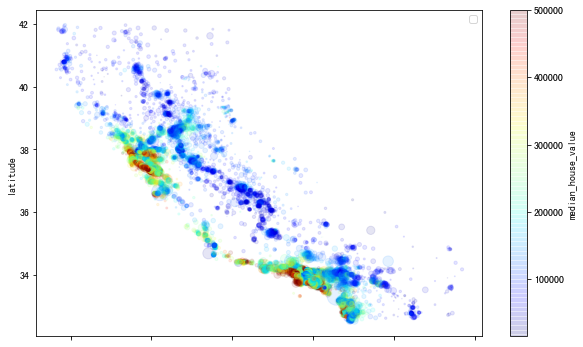

In [51]:
# 用人口数表示圆半径，房价表示颜色深度进行可视化

df.plot(kind='scatter', x="longitude", y="latitude", s=df["population"]/100, c="median_house_value",
        alpha=0.1, cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10, 6))
plt.legend()

可见，地理空间与房价有很高的相关性，可以考虑对地理空间进行聚类生成新的特征

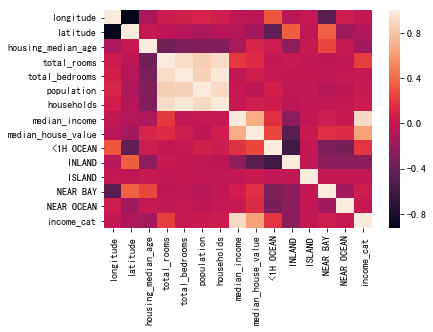

In [54]:
# 特征之间的相关性
df_corr = df.corr()
sns.heatmap(df_corr)

In [56]:
# 重点显示与标签y的相关系数
df_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a37318160>,
      dtype=object)

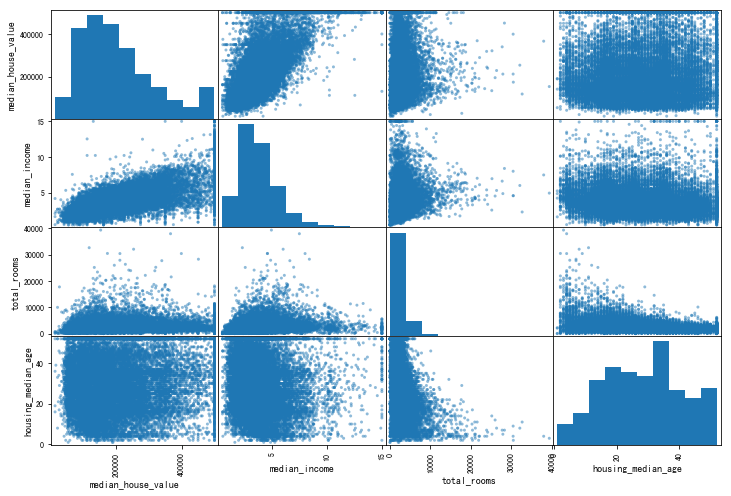

In [60]:
# 可以重点研究某些相关特征间的相关性
from pandas.plotting import scatter_matrix
plot_features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[plot_features], figsize=(12, 8))

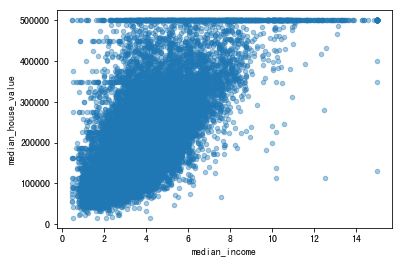

In [63]:
# 以"median_income"和"median_house_value"为例，研究两个特征间的关系
df.plot(kind='scatter', x="median_income",y="median_house_value", alpha=0.4)

In [73]:
# 注意到某些价格上的街区，尤其是50000为单位的街区数量很多。可能存在某种巧合。
for i in range(0, 510000, 10000):
    print("房价为{}的小区数量为{}个。".format(i,len(df[df["median_house_value"]==i])))

房价为0的小区数量为0个。
房价为10000的小区数量为0个。
房价为20000的小区数量为0个。
房价为30000的小区数量为2个。
房价为40000的小区数量为4个。
房价为50000的小区数量为11个。
房价为60000的小区数量为13个。
房价为70000的小区数量为13个。
房价为80000的小区数量为9个。
房价为90000的小区数量为15个。
房价为100000的小区数量为62个。
房价为110000的小区数量为11个。
房价为120000的小区数量为13个。
房价为130000的小区数量为8个。
房价为140000的小区数量为6个。
房价为150000的小区数量为64个。
房价为160000的小区数量为13个。
房价为170000的小区数量为10个。
房价为180000的小区数量为8个。
房价为190000的小区数量为10个。
房价为200000的小区数量为46个。
房价为210000的小区数量为11个。
房价为220000的小区数量为11个。
房价为230000的小区数量为9个。
房价为240000的小区数量为13个。
房价为250000的小区数量为47个。
房价为260000的小区数量为4个。
房价为270000的小区数量为8个。
房价为280000的小区数量为4个。
房价为290000的小区数量为5个。
房价为300000的小区数量为30个。
房价为310000的小区数量为8个。
房价为320000的小区数量为4个。
房价为330000的小区数量为8个。
房价为340000的小区数量为5个。
房价为350000的小区数量为79个。
房价为360000的小区数量为4个。
房价为370000的小区数量为4个。
房价为380000的小区数量为7个。
房价为390000的小区数量为4个。
房价为400000的小区数量为27个。
房价为410000的小区数量为4个。
房价为420000的小区数量为5个。
房价为430000的小区数量为2个。
房价为440000的小区数量为1个。
房价为450000的小区数量为37个。
房价为460000的小区数量为3个。
房价为470000的小区数量为3个。
房价为480000的小区数量为0个。
房价为490000的小区数量为1个。
房价为500000的小区数量为27个。


In [74]:
# 某些街区的经、维度一样
df[df["median_house_value"]==500000][["longitude", "latitude"]]

,longitude,latitude
4719,-118.38,34.06
4823,-118.31,34.05
5301,-118.45,34.06
5308,-118.44,34.05
6776,-118.15,34.12
8290,-118.16,33.72
8299,-118.14,33.77
8933,-118.48,34.00
9810,-121.94,36.58
9850,-121.89,36.60


In [77]:
# 拿个例子进行观察，这些经纬度一样的截取，既可能带来噪音，也可能带来数据的多样性，因此先不做处理。
df[(df['longitude']==-122.43)&(df['latitude']==37.80)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
15675,-122.43,37.8,52.0,3172.0,848.0,1259.0,806.0,4.1047,466700.0,NEAR BAY,0,0,0,1,0,3.0
15676,-122.43,37.8,52.0,2788.0,813.0,1302.0,764.0,4.1990,400000.0,NEAR BAY,0,0,0,1,0,3.0
15677,-122.43,37.8,52.0,2994.0,821.0,1240.0,779.0,3.3715,500000.0,NEAR BAY,0,0,0,1,0,3.0
15678,-122.43,37.8,52.0,1976.0,726.0,1045.0,669.0,3.6893,475000.0,NEAR BAY,0,0,0,1,0,3.0
15679,-122.43,37.8,52.0,1006.0,251.0,349.0,233.0,3.2235,500000.0,NEAR BAY,0,0,0,1,0,3.0
15680,-122.43,37.8,52.0,1380.0,322.0,553.0,288.0,4.0417,500001.0,NEAR BAY,0,0,0,1,0,3.0
15682,-122.43,37.8,52.0,2696.0,572.0,925.0,552.0,5.0365,500000.0,NEAR BAY,0,0,0,1,0,4.0
15683,-122.43,37.8,52.0,2520.0,649.0,959.0,607.0,5.7934,500001.0,NEAR BAY,0,0,0,1,0,4.0
15684,-122.43,37.8,52.0,2802.0,622.0,954.0,572.0,4.5399,500001.0,NEAR BAY,0,0,0,1,0,4.0


##### 特征组合

多尝试些特征组合方案

构造人均房间、每户人均户数等特征

In [78]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [80]:
# 可见有效
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
<1H OCEAN                   0.256617
NEAR BAY                    0.160284
rooms_per_household         0.151948
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
ISLAND                      0.023416
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
INLAND                     -0.484859
Name: median_house_value, dtype: float64

#### 数据准备

In [81]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

##### 数据清洗

**缺失值的处理**

/Users/guofei/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/guofei/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.469e+03, 3.796e+03, 7.190e+02, 1.800e+02, 8.100e+01, 3.200e+01,
        1.200e+01, 1.000e+01, 5.000e+00, 4.000e+00]),
 array([2.0000e+00, 5.4890e+02, 1.0958e+03, 1.6427e+03, 2.1896e+03,
        2.7365e+03, 3.2834e+03, 3.8303e+03, 4.3772e+03, 4.9241e+03,
        5.4710e+03]),
 <a list of 10 Patch objects>)

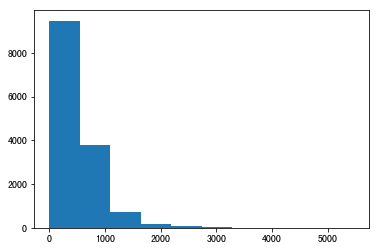

In [82]:
plt.hist(strat_train_set["total_bedrooms"])

In [193]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [195]:
housing_num = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
X = imputer.fit_transform(housing_num)

In [196]:
imputer.statistics_

array([-118.51 ,   34.26 ,   29.   , 2111.   ,  430.   , 1159.   ,
        406.   ,    3.536])

In [198]:
housing_tr = pd.DataFrame(X, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'])
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316
1,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844
2,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130
3,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214
4,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245


##### 搭建预处理pipeline

In [232]:
# 因为用sklearn做preprocessing时，所有数据均为ndarray，所以需要确定特征所在位置
class ColumnMapper(object):
    def __init__(self, data:pd.DataFrame):
        self.columns = data.columns.tolist()
        self.indices = np.arange(len(self.columns)).tolist()
    
    def get_index(self, column_names:list):
        return [self.indices[self.columns.index(item)] for item in column_names]

In [234]:
cm = ColumnMapper(housing_tr)
cm.get_index(['longitude','latitude'])

[0, 1]

指定特征的选择

In [229]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_attrs:list):
        self.selected_attrs = selected_attrs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        return X[self.selected_attrs].values

In [230]:
se = DataFrameSelector(['longitude'])
se.fit_transform(housing_tr)

array([[-118.41],
       [-117.83],
       [-118.33],
       ...,
       [-116.34],
       [-118.29],
       [-118.13]])

数值特征的转换包括缺失值处理、特征组合和标准化等步骤

In [231]:
# 缺失值处理器
imputer = SimpleImputer(strategy='median')

In [254]:
# 特征组合器,用于生成人均等指标
class FeaturesCombiner(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom=True):
        self.add_bedroom = add_bedroom
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # columnmapper = ColumnMapper(housing_num)
        rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
        # X = X.values
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedroom:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [248]:
featurecomb = FeaturesCombiner()
res = featurecomb.fit_transform(housing_num)

In [249]:
res.shape

(14448, 11)

In [250]:
# 标准化
std = StandardScaler()
std.fit(housing_num)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [256]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('imputer', imputer),("std",std)])
pipe.fit_transform(housing_num)

array([[ 0.58073699, -0.81762236,  0.17952267, ..., -0.66068886,
        -0.43692985,  1.77327111],
       [ 0.87028331, -0.7144537 ,  0.02047048, ...,  0.06318333,
        -0.13375973,  0.58674388],
       [ 0.62067442, -0.74728009,  0.17952267, ..., -0.41132521,
        -0.68159345, -0.50696051],
       ...,
       [ 1.61411781, -1.06616502, -0.37715998, ..., -0.61225132,
        -0.53266778, -0.29132429],
       [ 0.64064313, -0.90203308,  0.57715313, ...,  0.36008754,
         0.53640579, -0.05995359],
       [ 0.72051797, -0.80355391,  0.57715313, ..., -0.71630234,
        -0.76935322,  0.16127946]])